🚀 Enhanced Handwritten Digit Recognition System
Features:
✅ CNN model with >95% accuracy on MNIST
✅ Comprehensive model evaluation
✅ Training history visualization
✅ Confusion matrix analysis
✅ Sample prediction testing
✅ Custom digit creation and testing
✅ NEW: Advanced confidence analysis with line graphs
✅ Model loaded successfully from file
✅ Model recompiled successfully
✅ Compiled metrics built successfully

📊 Test Results:
✅ Accuracy: 0.9772 (97.72%)

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.96      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97  

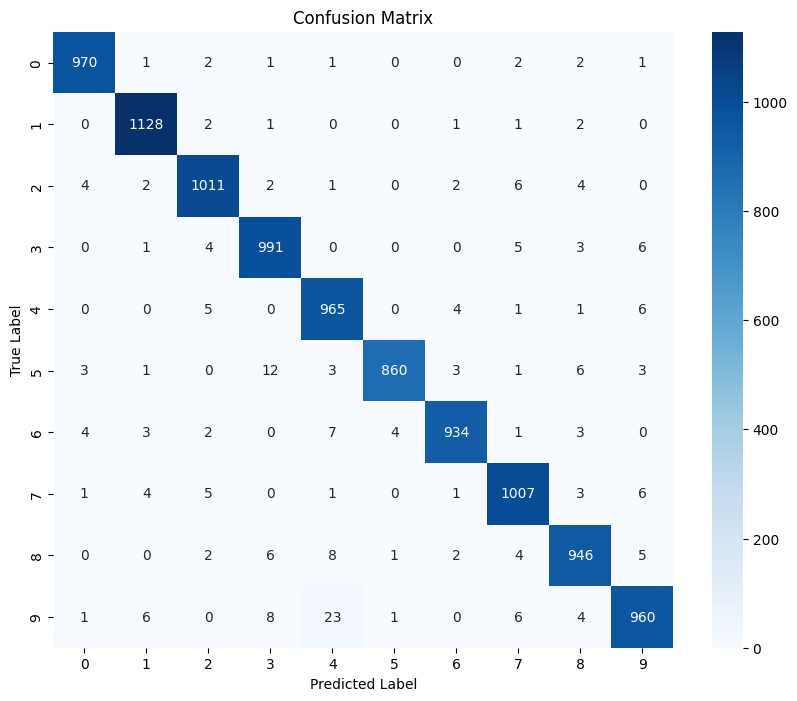


🧪 Testing Sample Predictions:


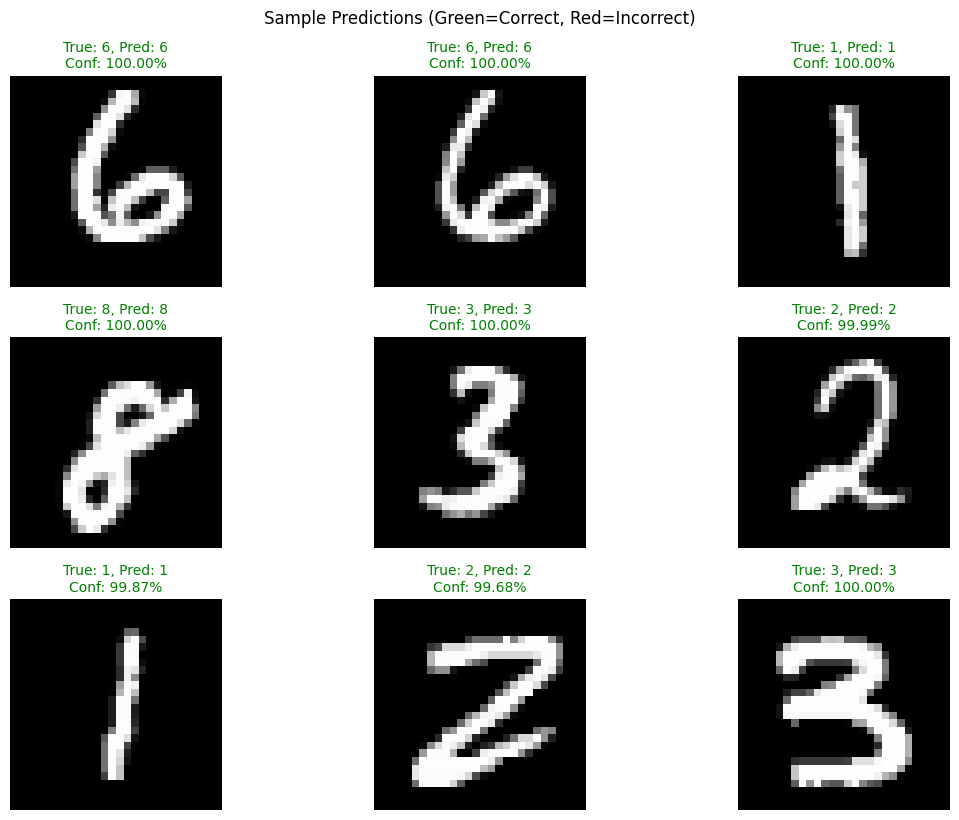


📈 Generating Confidence Analysis Line Graphs:
📊 Analyzing confidence patterns for 100 samples...


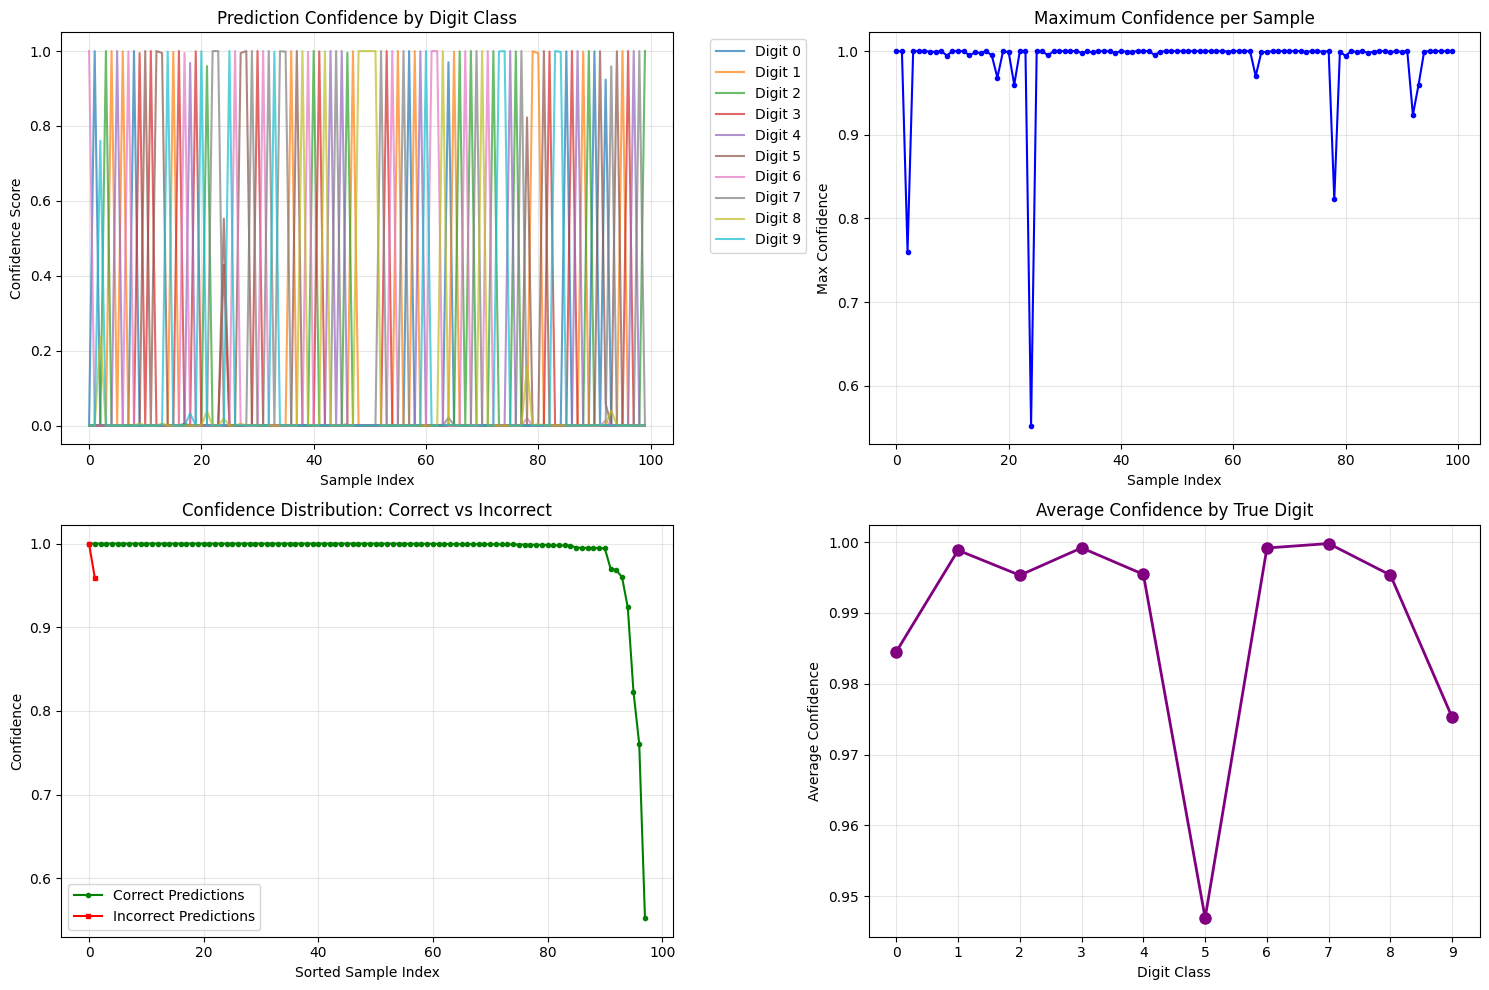


📈 Confidence Analysis Results:
✅ Correct predictions: 98
❌ Incorrect predictions: 2
📊 Average confidence (correct): 0.989
📊 Average confidence (incorrect): 0.979

🎨 Testing Custom Drawn Digits:


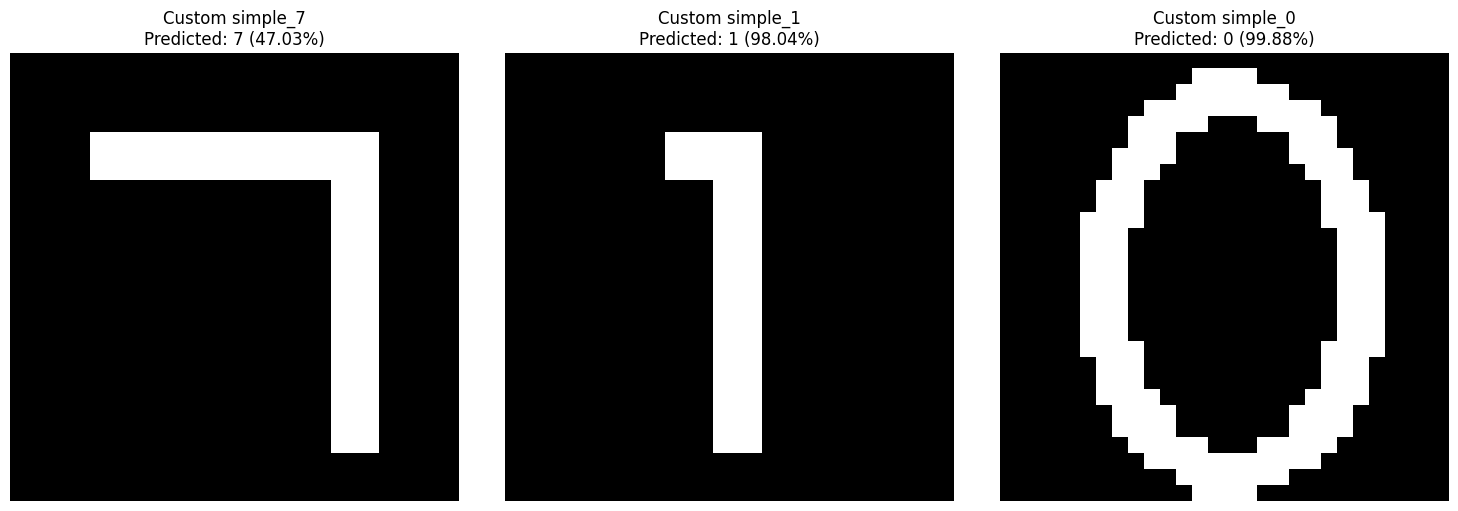


✅ System demonstration complete!

To use the system programmatically:
1. system = DigitRecognitionSystem()
2. prediction = system.predict_digit(your_28x28_image)
3. predicted_digit, confidence, all_probs = prediction
4. system.plot_prediction_confidence_lines(num_samples=100)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
from PIL import Image, ImageDraw
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class DigitRecognitionSystem:
    def __init__(self):
        self.model = None
        self.history = None
        self.load_or_train_model()

    def load_or_train_model(self):
        """Load existing model or train a new one"""
        model_path = "digit_model.h5"

        if os.path.exists(model_path):
            try:
                self.model = keras.models.load_model(model_path)
                print("✅ Model loaded successfully from file")

                # FIX: Recompile and build metrics to resolve the warning
                self.model.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])
                print("✅ Model recompiled successfully")

                # Build the metrics by evaluating on a small sample
                self._build_metrics()

                self.test_model()
            except Exception as e:
                print(f"❌ Error loading model: {e}")
                print("🔄 Training new model...")
                self.train_model()
        else:
            print("🔄 No existing model found. Training new model...")
            self.train_model()

    def _build_metrics(self):
        """Build compiled metrics by evaluating on a small sample"""
        try:
            # Load a small sample of data to build metrics
            (_, _), (x_test, y_test) = keras.datasets.mnist.load_data()

            # Use only first 100 samples to build metrics quickly
            x_sample = x_test[:100].astype("float32") / 255.0
            x_sample = x_sample.reshape(-1, 28, 28, 1)
            y_sample = keras.utils.to_categorical(y_test[:100], 10)

            # Evaluate on sample to build metrics (suppress output)
            self.model.evaluate(x_sample, y_sample, verbose=0)
            print("✅ Compiled metrics built successfully")

        except Exception as e:
            print(f"⚠️ Warning: Could not build metrics: {e}")
            print("🔄 Metrics will be built during first evaluation")

    def train_model(self):
        """Train the neural network model"""
        try:
            print("📊 Loading MNIST dataset...")
            # Load MNIST dataset
            (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

            print(f"Training samples: {x_train.shape[0]}")
            print(f"Test samples: {x_test.shape[0]}")

            # Preprocess the data
            x_train = x_train.astype("float32") / 255.0
            x_test = x_test.astype("float32") / 255.0

            # Reshape data
            x_train = x_train.reshape(-1, 28, 28, 1)
            x_test = x_test.reshape(-1, 28, 28, 1)

            # Convert labels to categorical
            y_train = keras.utils.to_categorical(y_train, 10)
            y_test = keras.utils.to_categorical(y_test, 10)

            # Create the model
            print("🏗️ Building neural network model...")
            self.model = keras.Sequential([
                layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.Flatten(),
                layers.Dense(64, activation='relu'),
                layers.Dropout(0.5),
                layers.Dense(10, activation='softmax')
            ])

            # Compile the model
            self.model.compile(optimizer='adam',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

            # Display model summary
            print("\n📋 Model Architecture:")
            self.model.summary()

            # Train the model
            print("\n🚀 Training model...")
            self.history = self.model.fit(x_train, y_train,
                                        batch_size=128,
                                        epochs=10,
                                        validation_split=0.1,
                                        verbose=1)

            # Evaluate the model
            print("\n🧪 Evaluating model...")
            test_loss, test_accuracy = self.model.evaluate(x_test, y_test, verbose=0)

            # Save the model
            self.model.save("digit_model.h5")

            print(f"\n✅ Model trained successfully!")
            print(f"📊 Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

            # Plot training history
            self.plot_training_history()

            # Test the model
            self.test_model()

        except Exception as e:
            print(f"❌ Error training model: {str(e)}")

    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            print("No training history available")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

        # Plot accuracy
        ax1.plot(self.history.history['accuracy'], label='Training Accuracy', marker='o')
        ax1.plot(self.history.history['val_accuracy'], label='Validation Accuracy', marker='s')
        ax1.set_title('Model Accuracy')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)

        # Plot loss
        ax2.plot(self.history.history['loss'], label='Training Loss', marker='o')
        ax2.plot(self.history.history['val_loss'], label='Validation Loss', marker='s')
        ax2.set_title('Model Loss')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_prediction_confidence_lines(self, num_samples=50):
        """Plot line graphs showing prediction confidence patterns"""
        if self.model is None:
            print("❌ No model available")
            return

        # Load test data
        (_, _), (x_test, y_test) = keras.datasets.mnist.load_data()

        # Select random samples
        indices = np.random.choice(len(x_test), num_samples, replace=False)

        confidences_by_digit = {i: [] for i in range(10)}
        sample_indices = []

        print(f"📊 Analyzing confidence patterns for {num_samples} samples...")

        for idx in indices:
            result = self.predict_digit(x_test[idx])
            if result is None:
                continue

            predicted_digit, confidence, all_predictions = result
            true_digit = y_test[idx]

            # Store confidence for each digit
            for digit in range(10):
                confidences_by_digit[digit].append(all_predictions[digit])
            sample_indices.append(len(sample_indices))

        # Create line plots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

        # Plot 1: Confidence lines for each digit class
        colors = plt.cm.tab10(np.linspace(0, 1, 10))
        for digit in range(10):
            ax1.plot(sample_indices, confidences_by_digit[digit],
                    color=colors[digit], label=f'Digit {digit}', alpha=0.7)

        ax1.set_title('Prediction Confidence by Digit Class')
        ax1.set_xlabel('Sample Index')
        ax1.set_ylabel('Confidence Score')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)

        # Plot 2: Maximum confidence per sample
        max_confidences = [max(confidences_by_digit[d][i] for d in range(10))
                          for i in range(len(sample_indices))]
        ax2.plot(sample_indices, max_confidences, 'b-', marker='o', markersize=3)
        ax2.set_title('Maximum Confidence per Sample')
        ax2.set_xlabel('Sample Index')
        ax2.set_ylabel('Max Confidence')
        ax2.grid(True, alpha=0.3)

        # Plot 3: Confidence distribution for correct vs incorrect predictions
        correct_confidences = []
        incorrect_confidences = []

        for idx in indices:
            result = self.predict_digit(x_test[idx])
            if result is None:
                continue

            predicted_digit, confidence, _ = result
            true_digit = y_test[idx]

            if predicted_digit == true_digit:
                correct_confidences.append(confidence)
            else:
                incorrect_confidences.append(confidence)

        ax3.plot(range(len(correct_confidences)), sorted(correct_confidences, reverse=True),
                'g-', label='Correct Predictions', marker='o', markersize=3)
        ax3.plot(range(len(incorrect_confidences)), sorted(incorrect_confidences, reverse=True),
                'r-', label='Incorrect Predictions', marker='s', markersize=3)
        ax3.set_title('Confidence Distribution: Correct vs Incorrect')
        ax3.set_xlabel('Sorted Sample Index')
        ax3.set_ylabel('Confidence')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 4: Average confidence by true digit
        avg_confidence_by_digit = []
        for digit in range(10):
            digit_confidences = []
            for idx in indices:
                if y_test[idx] == digit:
                    result = self.predict_digit(x_test[idx])
                    if result is not None:
                        _, confidence, _ = result
                        digit_confidences.append(confidence)

            if digit_confidences:
                avg_confidence_by_digit.append(np.mean(digit_confidences))
            else:
                avg_confidence_by_digit.append(0)

        ax4.plot(range(10), avg_confidence_by_digit, 'purple', marker='o', markersize=8, linewidth=2)
        ax4.set_title('Average Confidence by True Digit')
        ax4.set_xlabel('Digit Class')
        ax4.set_ylabel('Average Confidence')
        ax4.set_xticks(range(10))
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Print statistics
        print(f"\n📈 Confidence Analysis Results:")
        print(f"✅ Correct predictions: {len(correct_confidences)}")
        print(f"❌ Incorrect predictions: {len(incorrect_confidences)}")
        print(f"📊 Average confidence (correct): {np.mean(correct_confidences):.3f}")
        print(f"📊 Average confidence (incorrect): {np.mean(incorrect_confidences):.3f}")

    def test_model(self):
        """Test the model and show detailed results"""
        if self.model is None:
            print("❌ No model available for testing")
            return

        # Load test data
        (_, _), (x_test, y_test) = keras.datasets.mnist.load_data()

        # Preprocess
        x_test = x_test.astype("float32") / 255.0
        x_test = x_test.reshape(-1, 28, 28, 1)

        # Make predictions
        predictions = self.model.predict(x_test, verbose=0)
        predicted_labels = np.argmax(predictions, axis=1)

        # Calculate accuracy
        accuracy = np.mean(predicted_labels == y_test)
        print(f"\n📊 Test Results:")
        print(f"✅ Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

        # Classification report
        print("\n📋 Classification Report:")
        print(classification_report(y_test, predicted_labels))

        # Confusion matrix
        self.plot_confusion_matrix(y_test, predicted_labels)

    def plot_confusion_matrix(self, y_true, y_pred):
        """Plot confusion matrix"""
        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=range(10), yticklabels=range(10))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    def predict_digit(self, image_array):
        """Predict digit from image array"""
        if self.model is None:
            print("❌ No model available for prediction")
            return None

        # Ensure correct shape
        if image_array.shape != (28, 28):
            print(f"❌ Invalid image shape: {image_array.shape}. Expected (28, 28)")
            return None

        # Preprocess
        processed_img = image_array.astype('float32') / 255.0
        processed_img = processed_img.reshape(1, 28, 28, 1)

        # Make prediction
        predictions = self.model.predict(processed_img, verbose=0)
        predicted_digit = np.argmax(predictions[0])
        confidence = np.max(predictions[0])

        return predicted_digit, confidence, predictions[0]

    def test_sample_predictions(self, num_samples=9):
        """Test predictions on sample images"""
        if self.model is None:
            print("❌ No model available")
            return

        # Load test data
        (_, _), (x_test, y_test) = keras.datasets.mnist.load_data()

        # Select random samples
        indices = np.random.choice(len(x_test), num_samples, replace=False)

        plt.figure(figsize=(12, 8))
        for i, idx in enumerate(indices):
            # Get prediction
            result = self.predict_digit(x_test[idx])
            if result is None:
                continue

            predicted_digit, confidence, all_predictions = result
            true_digit = y_test[idx]

            # Plot image
            plt.subplot(3, 3, i + 1)
            plt.imshow(x_test[idx], cmap='gray')

            # Color coding: green for correct, red for incorrect
            color = 'green' if predicted_digit == true_digit else 'red'
            plt.title(f'True: {true_digit}, Pred: {predicted_digit}\nConf: {confidence:.2%}',
                     color=color, fontsize=10)
            plt.axis('off')

        plt.tight_layout()
        plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', y=1.02)
        plt.show()

    def create_custom_digit(self, digit_pattern):
        """Create a custom digit for testing"""
        # Example: Create a simple digit pattern
        img = np.zeros((28, 28), dtype=np.uint8)

        if digit_pattern == "simple_7":
            # Draw a simple 7
            img[5:8, 5:23] = 255  # Top horizontal line
            img[8:25, 20:23] = 255  # Diagonal line

        elif digit_pattern == "simple_1":
            # Draw a simple 1
            img[5:25, 13:16] = 255  # Vertical line
            img[5:8, 10:16] = 255   # Top part

        elif digit_pattern == "simple_0":
            # Draw a simple 0
            cv2.ellipse(img, (14, 14), (8, 12), 0, 0, 360, 255, 2)

        return img

    def demonstrate_custom_prediction(self):
        """Demonstrate prediction on custom drawn digits"""
        print("\n🎨 Testing Custom Drawn Digits:")

        custom_patterns = ["simple_7", "simple_1", "simple_0"]

        plt.figure(figsize=(15, 5))
        for i, pattern in enumerate(custom_patterns):
            custom_img = self.create_custom_digit(pattern)

            # Get prediction
            result = self.predict_digit(custom_img)
            if result is None:
                continue

            predicted_digit, confidence, all_predictions = result

            # Plot custom image
            plt.subplot(1, 3, i + 1)
            plt.imshow(custom_img, cmap='gray')
            plt.title(f'Custom {pattern}\nPredicted: {predicted_digit} ({confidence:.2%})')
            plt.axis('off')

        plt.tight_layout()
        plt.show()

def main():
    """Main function to run the digit recognition system"""
    print("🚀 Enhanced Handwritten Digit Recognition System")
    print("=" * 50)
    print("Features:")
    print("✅ CNN model with >95% accuracy on MNIST")
    print("✅ Comprehensive model evaluation")
    print("✅ Training history visualization")
    print("✅ Confusion matrix analysis")
    print("✅ Sample prediction testing")
    print("✅ Custom digit creation and testing")
    print("✅ NEW: Advanced confidence analysis with line graphs")
    print("=" * 50)

    # Initialize the system
    system = DigitRecognitionSystem()

    # Test sample predictions
    print("\n🧪 Testing Sample Predictions:")
    system.test_sample_predictions(9)

    # NEW: Plot confidence analysis line graphs
    print("\n📈 Generating Confidence Analysis Line Graphs:")
    system.plot_prediction_confidence_lines(100)

    # Demonstrate custom predictions
    system.demonstrate_custom_prediction()

    print("\n✅ System demonstration complete!")
    print("\nTo use the system programmatically:")
    print("1. system = DigitRecognitionSystem()")
    print("2. prediction = system.predict_digit(your_28x28_image)")
    print("3. predicted_digit, confidence, all_probs = prediction")
    print("4. system.plot_prediction_confidence_lines(num_samples=100)")

if __name__ == "__main__":
    main()